<a href="https://colab.research.google.com/github/CarlosJozala/Reconhecimento_Facial/blob/main/Reconhecimento_de_Face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Reconhecimento de face
from sklearn.datasets import fetch_lfw_people
faces=fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [2]:
# Labeled Faces in the Wild (LFW) dataset.
fetch_lfw_people

<function sklearn.datasets._lfw.fetch_lfw_people>

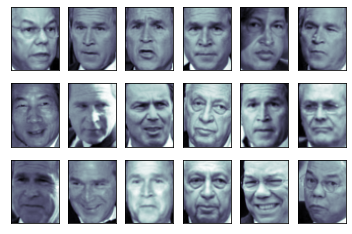

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3,6)
for i, axi in enumerate(ax.flat):
  axi.imshow(faces.images[i], cmap='bone')
  axi.set(xticks=[], yticks=[]),
  xlabel=faces.target_names[faces.target[i]] 

In [4]:
# Importação de Bibliotecas
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [5]:
# Criação da Máquina Preditiva com SVC e PCA
pca = PCA(n_components=150, whiten=True, random_state=7)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [6]:
# Separação dos Dados de Treino e Teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data ,faces.target, test_size=0.3, random_state = 7) 

In [7]:
# Tunning de Hyperparâmetro
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
              
grid = GridSearchCV(model,param_grid)

In [8]:
#Cálculo dos Melhores hyperparâmetros
grid.fit(X_train,y_train)
print(grid.best_params_)

{'svc__C': 10, 'svc__gamma': 0.0001}


In [10]:
#Visualizando o resultado do Tunning
grid.best_estimator_

Pipeline(steps=[('pca', PCA(n_components=150, random_state=7, whiten=True)),
                ('svc', SVC(C=10, class_weight='balanced', gamma=0.0001))])

In [11]:
#Treinando a Máquina Preditiva
model= grid.best_estimator_
yfit = model.predict(X_test)

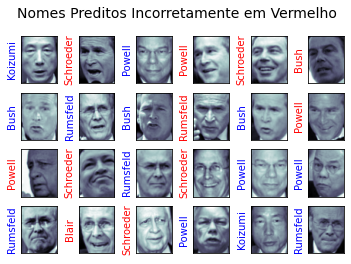

In [12]:
# Resultado do Treinamento
fig, ax = plt.subplots(4,6)
for i, axi in enumerate(ax.flat):
  axi.imshow(X_test[i].reshape(62,47), cmap='bone')
  axi.set(xticks=[], yticks=[])
  axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                  color='blue' if yfit[i] == y_test[i] else 'red')
fig.suptitle('Nomes Preditos Incorretamente em Vermelho', size=14);

In [13]:
#Avaliação da Máquina Preditiva com o Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.86      0.62      0.72        29
     Colin Powell       0.83      0.87      0.85        78
  Donald Rumsfeld       0.79      0.79      0.79        39
    George W Bush       0.90      0.81      0.85       157
Gerhard Schroeder       0.57      0.72      0.64        29
      Hugo Chavez       0.77      0.81      0.79        21
Junichiro Koizumi       0.79      0.92      0.85        12
       Tony Blair       0.71      0.88      0.79        40

         accuracy                           0.81       405
        macro avg       0.78      0.80      0.78       405
     weighted avg       0.82      0.81      0.81       405



In [ ]:
#Avaliação da Máquina Preditiva com a Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(y_test, yfit)
sns.heatmap(mat.T, square=True , annot=True , fmt='d' ,  cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('Foto Real - true label ')
plt.ylabel('predicted label - Predito pela Máquina');

In [14]:
#Avaliação da Máquina Preditiva com o Accuray Score
from sklearn.metrics import accuracy_score
resultado = accuracy_score(y_test, yfit)
resultado

0.8098765432098766